<a href="https://colab.research.google.com/github/joedockrill/heroku/blob/master/NeuralNetDemo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np

class NNDemo():
  def __init__(self):
    self.X = np.array([ [0,0,1],
                        [0,1,1],
                        [1,0,1],
                        [1,1,1] ])
        
    self.y = np.array([[0,0,1,1]]).T
    self.w1 = 2*np.random.random((3,1))-1
    self.i = 0
    self.max_loops = 1000
    self.l1, self.l1_error, self.l1_delta = (None, None, None)
    self.mae = []

  def sigmoid(self,x,deriv=False):
    return x*(1-x) if deriv else 1/(1+np.exp(-x))

  def finished(self): return self.i == self.max_loops

  def step(self):
    self.l1 = self.sigmoid(np.dot(self.X,self.w1))  # forward
    self.l1_error = self.y - self.l1                # error
    self.mae.append(abs(self.l1_error).mean())

    # * how much we missed by the slope of the sigmoid at the values in l1
    self.l1_delta = self.l1_error * self.sigmoid(self.l1,True)
    self.w1 += np.dot(self.X.T,self.l1_delta)       # update weights
    self.i += 1

# My First Neural Net Demo

This demo is inspired by [matrixmultiplication.xyz](http://matrixmultiplication.xyz) (which is very lovely because you can see what's happening step by step) and Andrew Trask's ["A Neural Network in 11 lines of Python"](https://iamtrask.github.io/2015/07/12/basic-python-network/) article (which is very lovely because it does exactly what it says on the tin).

You can step through the demo epoch by epoch (or x10 or x100 to speed things up a bit) and watch it calculate the error/loss and update the weights.

This is based on an article from 5 years ago so it's using a sigmoid, but I think that makes it easier to visualise anyway. I suggest you read the article in conjunction with playing with the demo.

``` python
import numpy as np

def sigmoid(x,deriv=False):
  return x*(1-x) if deriv else 1/(1+np.exp(-x))

X = np.array([ [0,0,1],
               [0,1,1],
               [1,0,1],
               [1,1,1] ])
    
y = np.array([[0,0,1,1]]).T

w1 = 2*np.random.random((3,1))-1         # init weights with mean 0

for i in range(10000):
  l1 = sigmoid(np.dot(X,w1))             # forward
  l1_error = y - l1                      # error
  l1_delta = l1_error * sigmoid(l1,True) # how much we missed * slope of the sigmoid
  w1 += np.dot(X.T,l1_delta)             # update weights
```

HTML(value='<h1>Test</h1>')

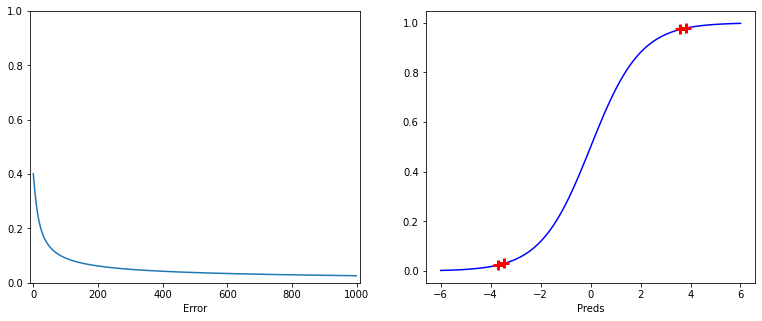

In [12]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
from IPython.display import clear_output

RUN_TO_END = -1

def reset_onclick(btn):
  global model
  model = NNDemo()
  render_model(model, 1)

def epoch_onclick(btn):
  render_model(model, btn.tag)

def runtoend_onclick(btn):
  render_model(model, RUN_TO_END)

def render_model(model, steps=0):
  clear_output(wait=True)
  
  html = widgets.HTML(value="<h1>Test</h1>")
  display(html)

  btnReset = widgets.Button(description="Reset")
  btnReset.on_click(reset_onclick)
  btnEpoch = widgets.Button(description="Epoch")
  btnEpoch.tag = 1
  btnEpoch.on_click(epoch_onclick)
  btnEpoch10 = widgets.Button(description="Epoch x 10")
  btnEpoch10.tag = 10
  btnEpoch10.on_click(epoch_onclick)
  btnEpoch100 = widgets.Button(description="Epoch x 100")
  btnEpoch100.tag = 100
  btnEpoch100.on_click(epoch_onclick)
  btnRun = widgets.Button(description="Run To End")
  btnRun.on_click(runtoend_onclick)
  btns = [btnReset, btnEpoch, btnEpoch10, btnEpoch100, btnRun]
  box = widgets.HBox(btns)
  display(box)

  np.set_printoptions(precision=3, suppress=True)
  fmt = lambda x: str(x).replace("\n", "<br>").replace(" ", "&nbsp;")
  th =  lambda x: "<th bgcolor='grey'>" + x + "</th>"
  td =  lambda x: "<td bgcolor='#cccccc' valign='top'>" + fmt(x) + "</td>"
  tr =  lambda x: "<tr>" + "".join(x) + "</tr>"

  s = "<table width='850px' border='1px solid black' style='font-family:monospace;'>"
  s += tr([th("Epoch"),th("X"),th("prev w1"),th("prev preds (l1)"),th("y"),th("new preds"),
           th("error (l1-y)"),th("delta"),th("new w1")])
  
  data = []
  if(steps==RUN_TO_END):
    data.append(td("Epoch 1000 of 1000"))
  else:
    data.append(td("Epoch {} of 1000".format(model.i+steps)))
  data.append(td(model.X))
  data.append(td(model.w1))
  data.append(td(model.l1))
  data.append(td(model.y))
  

  if(steps==RUN_TO_END): 
    while not model.finished(): model.step()
  else:          
    for i in range(int(steps)): model.step()

  if(model.l1 is not None):
    data.append(td(model.l1))
    data.append(td(model.l1_error))
    data.append(td(model.l1_delta))
    data.append(td(model.w1))
  else:
    for i in range(4): 
      data.append(td(None))

  s += tr(data)
  s += "</table>"

  html.value = s

  fig = plt.figure(figsize=(13,5))
  ax1 = fig.add_subplot(121)
  ax2 = fig.add_subplot(122)

  ax1.plot(range(len(model.mae)),model.mae)[0]
  ax1.set_ylim(0,1)
  ax1.set_xlim(-10,1010)
  ax1.set_xlabel("Error")
  
  sigmoid = lambda x: 1 / (1 + np.exp(-x))
  plt_pred = lambda p: ax2.plot(x[(np.abs(y-p)).argmin()], p, 'r+', mew=3, ms=10)

  x=np.linspace(-6,6,100)
  y=sigmoid(x)

  ax2.plot(x,y,'b')
  for pred in model.l1: plt_pred(pred)
  ax2.set_xlabel("Preds")

model = NNDemo()
render_model(model, 1)